In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
cov_052020 = pd.read_csv("pnad-covid-19/PNAD_COVID_052020.csv")
cov_062020 = pd.read_csv("pnad-covid-19/PNAD_COVID_062020.csv")
cov_072020 = pd.read_csv("pnad-covid-19/PNAD_COVID_072020.csv")
cov_082020 = pd.read_csv("pnad-covid-19/PNAD_COVID_082020.csv")
cov_092020 = pd.read_csv("pnad-covid-19/PNAD_COVID_092020.csv")
cov_102020 = pd.read_csv("pnad-covid-19/PNAD_COVID_102020.csv")
cov_112020 = pd.read_csv("pnad-covid-19/PNAD_COVID_112020.csv")

In [4]:
cov_052020["Mês"] = "Maio"
cov_062020["Mês"] = "Junho"
cov_072020["Mês"] = "Julho"
cov_082020["Mês"] = "Agosto"
cov_092020["Mês"] = "Setembro"
cov_102020["Mês"] = "Outubro"
cov_112020["Mês"] = "Novembro"


In [4]:
columns_to_select = ['UF', 'Mês', 'B002', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B007', 'B005']

In [5]:
cov_052020 = cov_052020[columns_to_select]
cov_062020 = cov_062020[columns_to_select]
cov_072020 = cov_072020[columns_to_select]
cov_082020 = cov_082020[columns_to_select]
cov_092020 = cov_092020[columns_to_select]
cov_102020 = cov_102020[columns_to_select]
cov_112020 = cov_112020[columns_to_select]

In [6]:
mapeamento_ufs = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará',
    16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará',
    24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas',
    28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo',
    33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina',
    43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51: 'Mato Grosso',
    52: 'Goiás', 53: 'Distrito Federal'
}

In [7]:
cov_052020['UF'].replace(mapeamento_ufs, inplace=True)
cov_062020['UF'].replace(mapeamento_ufs, inplace=True)
cov_072020['UF'].replace(mapeamento_ufs, inplace=True)
cov_082020['UF'].replace(mapeamento_ufs, inplace=True)
cov_092020['UF'].replace(mapeamento_ufs, inplace=True)
cov_102020['UF'].replace(mapeamento_ufs, inplace=True)
cov_112020['UF'].replace(mapeamento_ufs, inplace=True)

In [8]:
mapeamento_respostas = {
    1: 'Sim',
    2: 'Não',
    3: 'Não sabe',
    9: 'Ignorado'
}

In [9]:
cov_052020.replace(mapeamento_respostas, inplace=True)
cov_062020.replace(mapeamento_respostas, inplace=True)
cov_072020.replace(mapeamento_respostas, inplace=True)
cov_082020.replace(mapeamento_respostas, inplace=True)
cov_092020.replace(mapeamento_respostas, inplace=True)
cov_102020.replace(mapeamento_respostas, inplace=True)
cov_112020.replace(mapeamento_respostas, inplace=True)

In [10]:
cov_total = pd.concat([cov_052020, cov_062020, cov_072020, cov_082020, cov_092020, cov_102020, cov_112020])

In [11]:
mapeamento_perguntas = {
    "B002"  : "Por causa disso, foi a algum estabelecimento de saúde?",
    "B0041" : "Local que buscou atendimento foi posto de saúde/Unidade básica de saúde /Equipe de Saúde da Família (médico, enfermeiro, técnico de enfermagem ou agente comunitário de saúde)",
    "B0042" : "Local que buscou atendimento foi pronto socorro do SUS/UPA",
    "B0043" : "Local que buscou atendimento foi hospital do SUS",
    "B0044" : "Local que buscou atendimento foi ambulatório ou consultório privado ou ligado às forças armadas",
    "B0045" : "Local que buscou atendimento foi pronto socorro privado ou ligado às forças armadas",
    "B0046" : "Local que buscou atendimento foi hospital privado ou ligado às forças armadas",
    "B007" : "Tem algum plano de saúde médico, seja particular, de empresa ou de órgão público",
    "B005" : "Ao procurar o hospital, teve que ficar internado por um dia ou mais"
}

In [12]:
cov_total.rename(columns=mapeamento_perguntas, inplace=True)

In [13]:
question_b002 = cov_total.groupby(['UF', 'Mês', 'Por causa disso, foi a algum estabelecimento de saúde?']).size().reset_index(name='Total amount')
question_b0041 = cov_total.groupby(['UF', 'Mês', 'Local que buscou atendimento foi posto de saúde/Unidade básica de saúde /Equipe de Saúde da Família (médico, enfermeiro, técnico de enfermagem ou agente comunitário de saúde)']).size().reset_index(name='Total amount')
question_b0042 = cov_total.groupby(['UF', 'Mês', 'Local que buscou atendimento foi pronto socorro do SUS/UPA']).size().reset_index(name='Total amount')
question_b0043 = cov_total.groupby(['UF', 'Mês', 'Local que buscou atendimento foi hospital do SUS']).size().reset_index(name='Total amount')
question_b0044 = cov_total.groupby(['UF', 'Mês', 'Local que buscou atendimento foi ambulatório ou consultório privado ou ligado às forças armadas']).size().reset_index(name='Total amount')
question_b0045 = cov_total.groupby(['UF', 'Mês', 'Local que buscou atendimento foi pronto socorro privado ou ligado às forças armadas']).size().reset_index(name='Total amount')
question_b0046 = cov_total.groupby(['UF', 'Mês', 'Local que buscou atendimento foi hospital privado ou ligado às forças armadas']).size().reset_index(name='Total amount')
question_b007 = cov_total.groupby(['UF', 'Mês', 'Tem algum plano de saúde médico, seja particular, de empresa ou de órgão público']).size().reset_index(name='Total amount')
question_b005 = cov_total.groupby(['UF', 'Mês', 'Ao procurar o hospital, teve que ficar internado por um dia ou mais']).size().reset_index(name='Total amount')

In [14]:
grouped_b005 = question_b005.groupby(['Mês', 'Ao procurar o hospital, teve que ficar internado por um dia ou mais'])['Total amount'].sum().unstack().reset_index()
grouped_b007 = question_b007.groupby(['Mês', 'Tem algum plano de saúde médico, seja particular, de empresa ou de órgão público'])['Total amount'].sum().unstack().reset_index()

In [15]:
month_order = ['Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro']
grouped_b005['Mês'] = pd.Categorical(grouped_b005['Mês'], categories=month_order, ordered=True)
grouped_b005 = grouped_b005.sort_values('Mês')
grouped_b007['Mês'] = pd.Categorical(grouped_b007['Mês'], categories=month_order, ordered=True)
grouped_b007 = grouped_b007.sort_values('Mês')

In [16]:
def add_values_on_bars(ax, spacing=5):
    for p in ax.patches:
        y_value = p.get_height()
        x_value = p.get_x() + p.get_width() / 2
        if y_value == 0:
            continue
        label = "{:.0f}".format(y_value)
        ax.text(x_value, p.get_y() + y_value / 2, label, ha='center', va='center', fontsize=10, color='black')

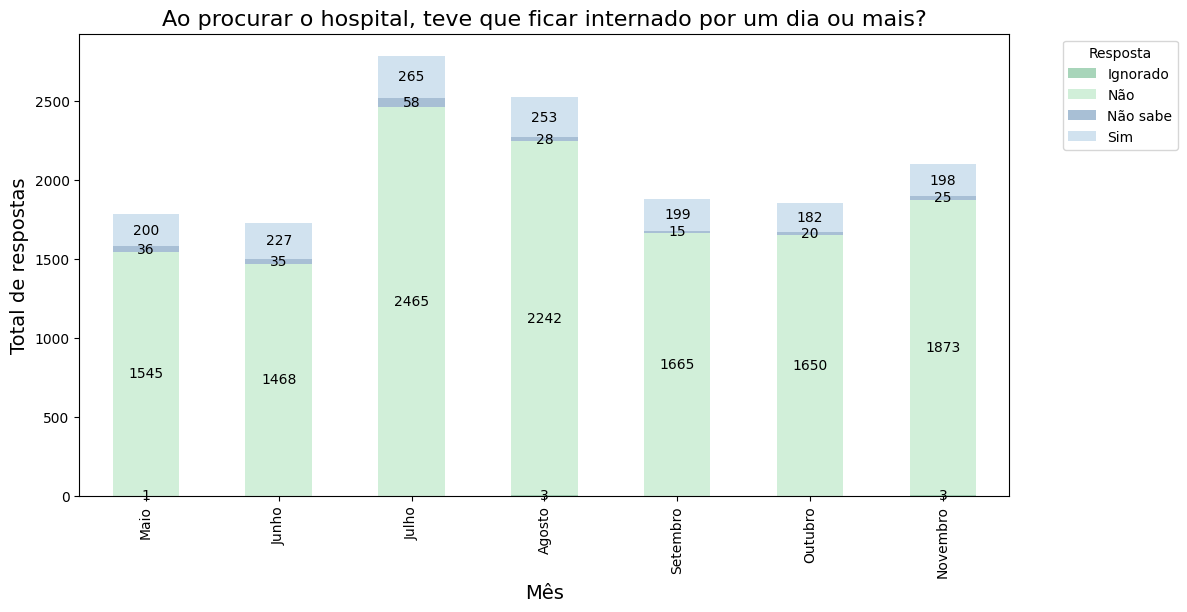

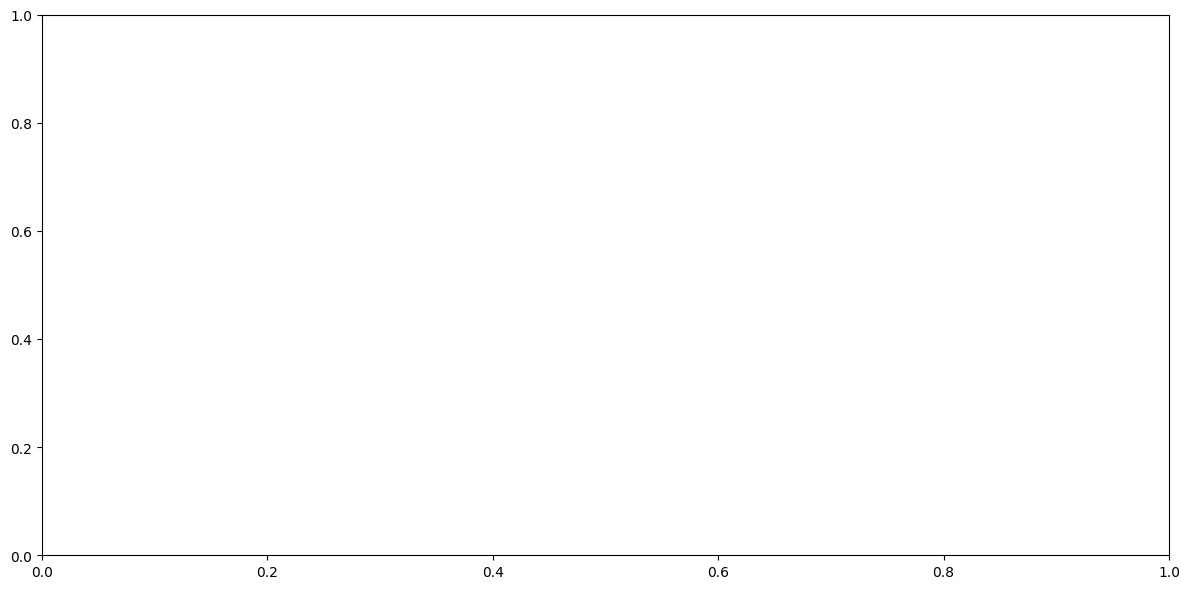

In [107]:
pastel_colors = ['#A8D5BA', '#D1EFD9', '#A8BFD5', '#D1E2EF']

fig, ax1 = plt.subplots(figsize=(12, 6))
grouped_b005.plot(x='Mês', kind='bar', stacked=True, ax=ax1, color=pastel_colors)
add_values_on_bars(ax1)
ax1.set_title('Ao procurar o hospital, teve que ficar internado por um dia ou mais?', fontsize=16)
ax1.set_ylabel('Total de respostas', fontsize=14)
ax1.set_xlabel('Mês', fontsize=14)
ax1.legend(title="Resposta", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(12, 6))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

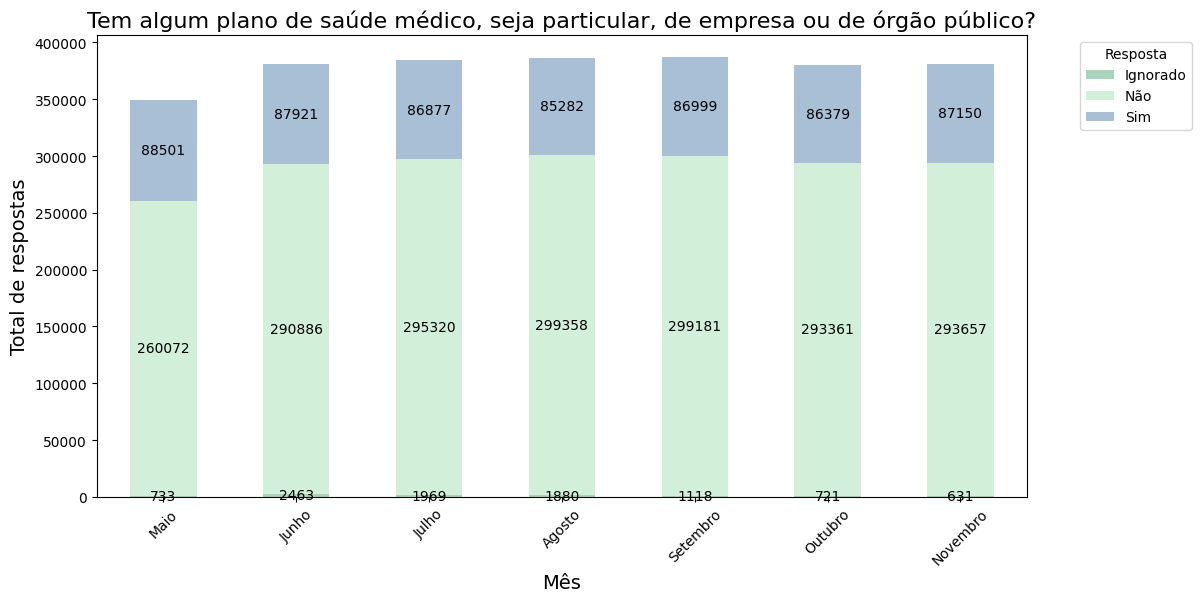

<Figure size 1200x600 with 0 Axes>

In [109]:
fig, ax2 = plt.subplots(figsize=(12, 6))
grouped_b007.plot(x='Mês', kind='bar', stacked=True, ax=ax2, color=pastel_colors)
add_values_on_bars(ax2)
ax2.set_title('Tem algum plano de saúde médico, seja particular, de empresa ou de órgão público?', fontsize=16)
ax2.set_ylabel('Total de respostas', fontsize=14)
ax2.set_xlabel('Mês', fontsize=14)
ax2.legend(title="Resposta", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))

plt.tight_layout()
plt.show()

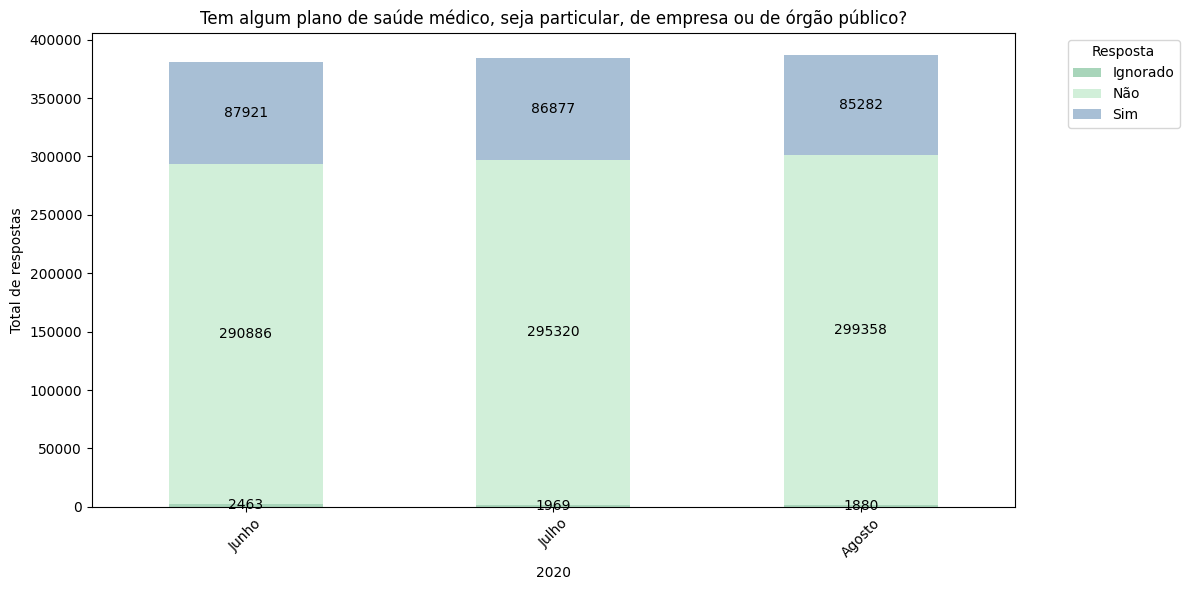

In [121]:
selected_months = ['Junho', 'Julho', 'Agosto']
filtered_data = grouped_b007[grouped_b007['Mês'].isin(selected_months)]

fig, ax2 = plt.subplots(figsize=(12, 6))
filtered_data.plot(x='Mês', kind='bar', stacked=True, ax=ax2, color=pastel_colors)
add_values_on_bars(ax2)
ax2.set_title('Tem algum plano de saúde médico, seja particular, de empresa ou de órgão público?')
ax2.set_ylabel('Total de respostas')
ax2.set_xlabel('2020')
ax2.legend(title="Resposta", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Leitos

https://opendatasus.saude.gov.br/

In [34]:
leitos_2020 = pd.read_csv("leitos/Leitos_2020.csv")

In [35]:
leitos_2020["Mes"] = leitos_2020["COMP"].astype(str).str[-2:].astype(int)
leitos_2020 = leitos_2020.groupby('Mes').sum().reset_index()


In [126]:
leitos_2020.to_csv("leitos_2020_sum.csv")

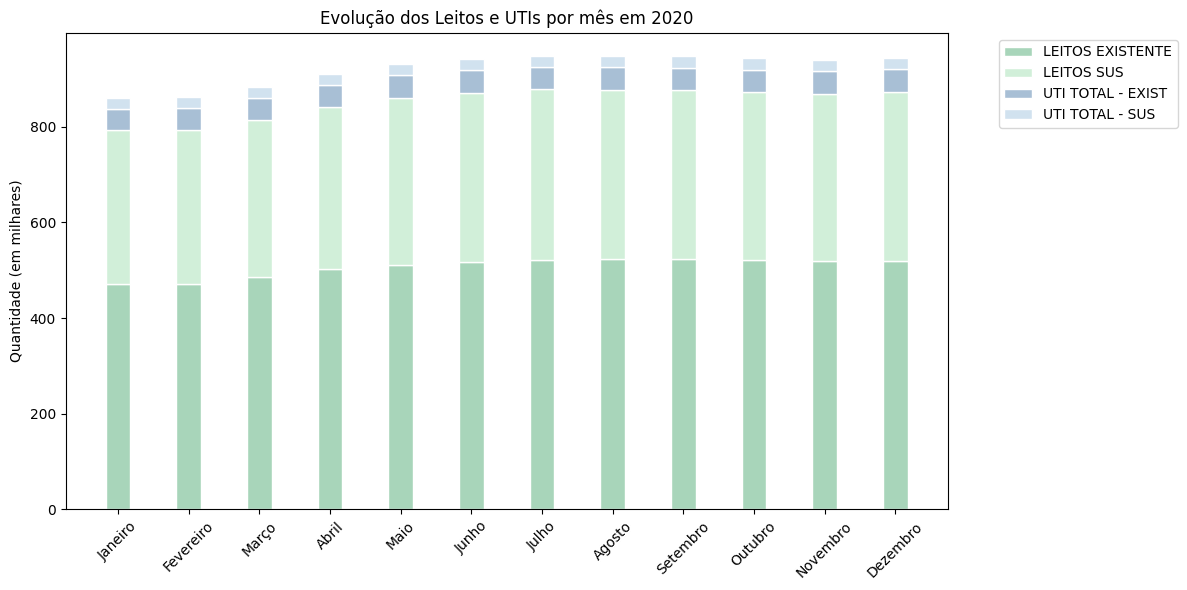

In [58]:
cores = ['#A8D5BA', '#D1EFD9', '#A8BFD5', '#D1E2EF']

bar_width = 0.35

r = range(len(leitos_2020))

plt.figure(figsize=(12, 6))

plt.bar(r, leitos_2020["LEITOS EXISTENTE"], color=cores[0], width=bar_width, edgecolor='white', label='LEITOS EXISTENTE')
plt.bar(r, leitos_2020["LEITOS SUS"], bottom=leitos_2020["LEITOS EXISTENTE"], 
        color=cores[1], width=bar_width, edgecolor='white', label='LEITOS SUS')

plt.bar(r, leitos_2020["UTI TOTAL - EXIST"], bottom=leitos_2020["LEITOS EXISTENTE"] + leitos_2020["LEITOS SUS"], 
        color=cores[2], width=bar_width, edgecolor='white', label='UTI TOTAL - EXIST')
plt.bar(r, leitos_2020["UTI TOTAL - SUS"], bottom=leitos_2020["LEITOS EXISTENTE"] + leitos_2020["LEITOS SUS"] + leitos_2020["UTI TOTAL - EXIST"], 
        color=cores[3], width=bar_width, edgecolor='white', label='UTI TOTAL - SUS')

meses_completos = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
                   "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]

plt.title("Evolução dos Leitos e UTIs por mês em 2020")
plt.ylabel("Quantidade (em milhares)")
plt.xticks(r, meses_completos, rotation=45)

def formatar_milhares_2(x, _):
    return f"{int(x/1000)}"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formatar_milhares_2))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Ocupação leitos 2020

https://opendatasus.saude.gov.br/

In [38]:
ocup_leitos_2020 = pd.read_csv("esus-vepi.LeitoOcupacao_2020 (1).csv", low_memory=False)

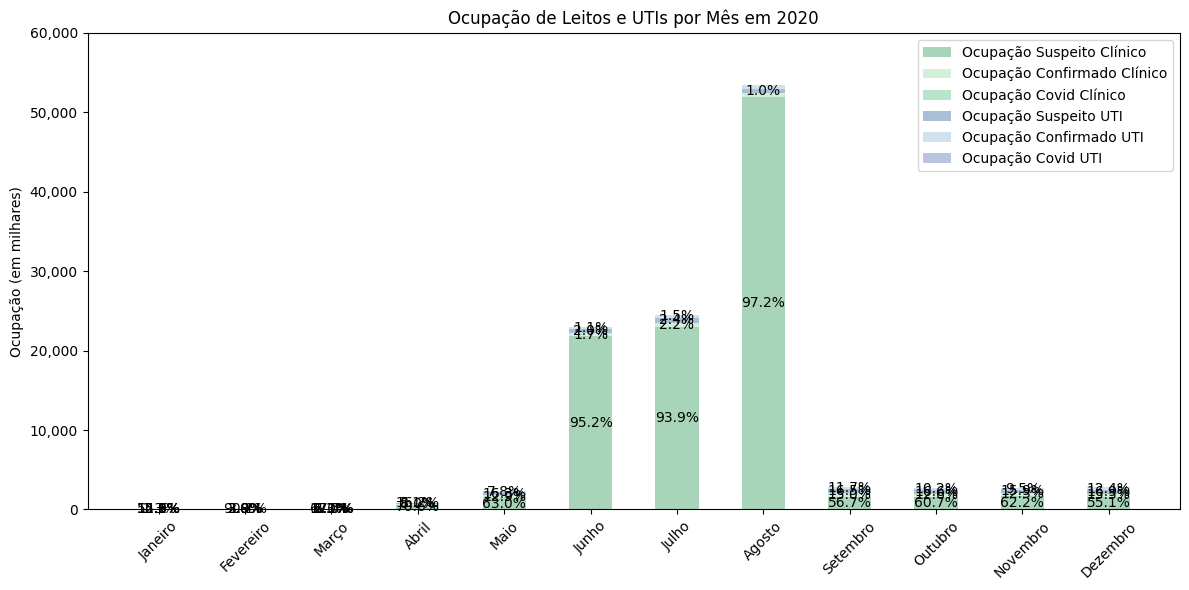

In [63]:

months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
          "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])

colors = ['#A8D5BA', '#D1EFD9', '#B8E4C9', '#A8BFD5', '#D1E2EF', '#B8C4E0']

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.5
index = np.arange(len(ocup_leitos_2020_agrupado['Mes']))

categorias = ['Ocupação Suspeito Clínico', 'Ocupação Confirmado Clínico', 'Ocupação Covid Clínico',
              'Ocupação Suspeito UTI', 'Ocupação Confirmado UTI', 'Ocupação Covid UTI']

bottom_value = np.zeros(len(ocup_leitos_2020_agrupado))
for i, categoria in enumerate(categorias):
    valores = ocup_leitos_2020_agrupado[categoria]
    ax.bar(index, valores, bar_width, bottom=bottom_value, color=colors[i], label=categoria)
    for j in range(len(valores)):
        porcentagem = valores[j] / (ocup_leitos_2020_agrupado[categorias].sum(axis=1)[j]) * 100
        if porcentagem > 1:  # Apenas exibir rótulos para porcentagens significativas
            ax.text(j, bottom_value[j] + valores[j] / 2, f"{porcentagem:.1f}%", ha='center', va='center')
    bottom_value += valores

ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de Leitos e UTIs por Mês em 2020')
ax.set_xticks(index)
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()

ax.set_ylim(0, 60000000)

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x)/1000, ',').replace(".0", ""))
)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


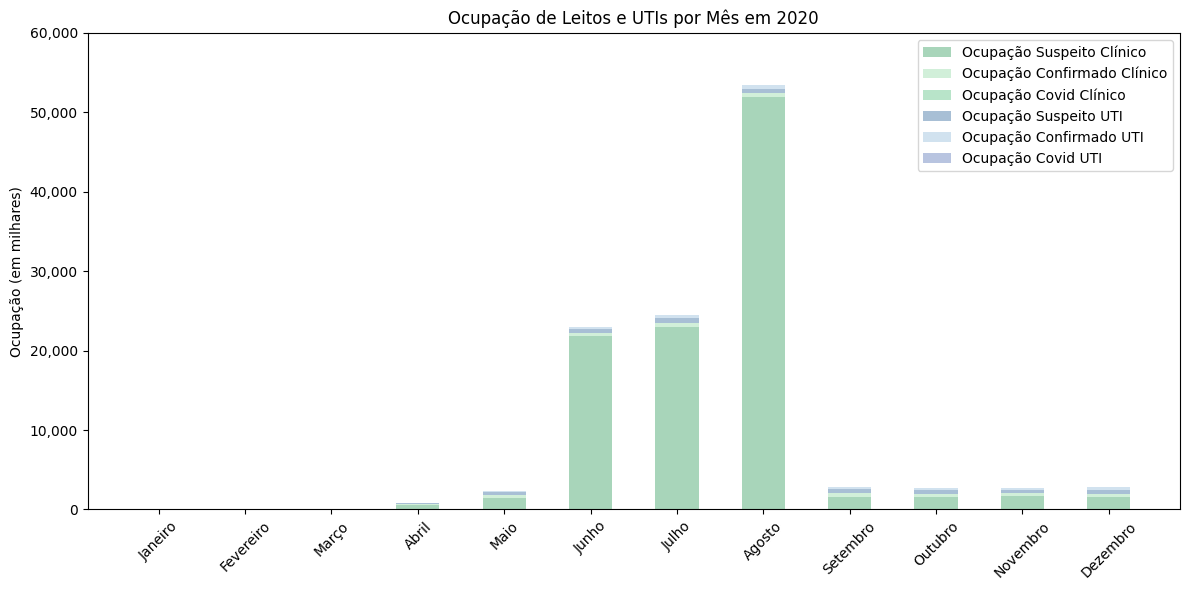

In [62]:
import matplotlib.pyplot as plt
import numpy as np

months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
          "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])

colors = ['#A8D5BA', '#D1EFD9', '#B8E4C9', '#A8BFD5', '#D1E2EF', '#B8C4E0']

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.5
index = np.arange(len(ocup_leitos_2020_agrupado['Mes']))

categorias = ['Ocupação Suspeito Clínico', 'Ocupação Confirmado Clínico', 'Ocupação Covid Clínico',
              'Ocupação Suspeito UTI', 'Ocupação Confirmado UTI', 'Ocupação Covid UTI']

bottom_value = 0
for i, categoria in enumerate(categorias):
    ax.bar(index, ocup_leitos_2020_agrupado[categoria], bar_width, bottom=bottom_value, color=colors[i], label=categoria)
    bottom_value += ocup_leitos_2020_agrupado[categoria]

ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de Leitos e UTIs por Mês em 2020')
ax.set_xticks(index)
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()

ax.set_ylim(0, 60000000)

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x)/1000, ',').replace(".0", ""))
)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


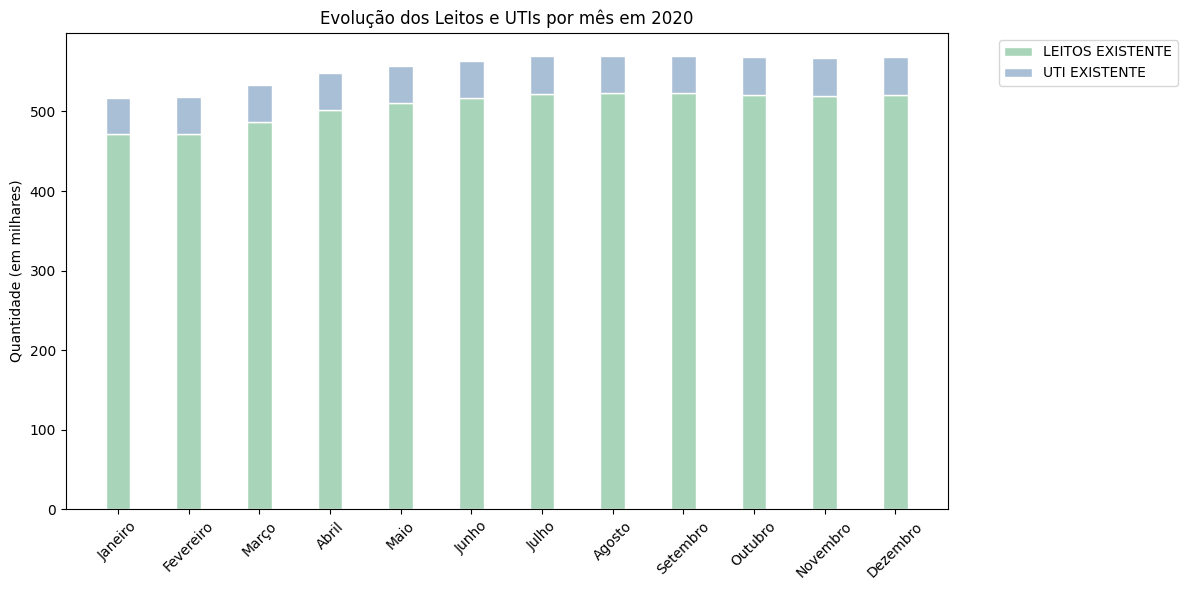

In [61]:
cores = ['#A8D5BA', '#A8BFD5']

bar_width = 0.35

r = range(len(leitos_2020))

plt.figure(figsize=(12, 6))

plt.bar(r, leitos_2020["LEITOS EXISTENTE"], color=cores[0], width=bar_width, edgecolor='white', label='LEITOS EXISTENTE')

plt.bar(r, leitos_2020["UTI TOTAL - EXIST"], bottom=leitos_2020["LEITOS EXISTENTE"], 
        color=cores[1], width=bar_width, edgecolor='white', label='UTI EXISTENTE')

meses_completos = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
                   "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]

plt.title("Evolução dos Leitos e UTIs por mês em 2020")
plt.ylabel("Quantidade (em milhares)")
plt.xticks(r, meses_completos, rotation=45)

def formatar_milhares_2(x, _):
    return f"{int(x/1000)}"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formatar_milhares_2))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [39]:
mapeamento_colunas_corrigido = {
    'dataNotificacao': 'Data Notificação',
    'cnes': 'CNES',
    'ocupacaoSuspeitoCli': 'Ocupação Suspeito Clínico',
    'ocupacaoSuspeitoUti': 'Ocupação Suspeito UTI',
    'ocupacaoConfirmadoCli': 'Ocupação Confirmado Clínico',
    'ocupacaoConfirmadoUti': 'Ocupação Confirmado UTI',
    'ocupacaoCovidUti': 'Ocupação Covid UTI',
    'ocupacaoCovidCli': 'Ocupação Covid Clínico'
}

In [40]:
ocup_leitos_2020.rename(columns= mapeamento_colunas_corrigido, inplace= True)

In [41]:
ocup_leitos_2020["Mes"] = pd.to_datetime(ocup_leitos_2020["Data Notificação"], errors='coerce').dt.month

ocup_leitos_2020 = ocup_leitos_2020.dropna(subset=['Mes'])

ocup_leitos_2020["Mes"] = ocup_leitos_2020["Mes"].astype(int)


In [42]:
colunas_de_interesse = ['Mes', 'Ocupação Suspeito Clínico', 'Ocupação Suspeito UTI', 'Ocupação Confirmado Clínico',
                        'Ocupação Confirmado UTI', 'Ocupação Covid UTI', 'Ocupação Covid Clínico']


In [43]:
ocup_leitos_2020 = ocup_leitos_2020[colunas_de_interesse]

In [44]:
ocup_leitos_2020_agrupado = ocup_leitos_2020.groupby('Mes').sum().reset_index()

In [45]:
ocup_leitos_2020_agrupado.to_csv("ocup_leitos_2020_agrupado.csv")

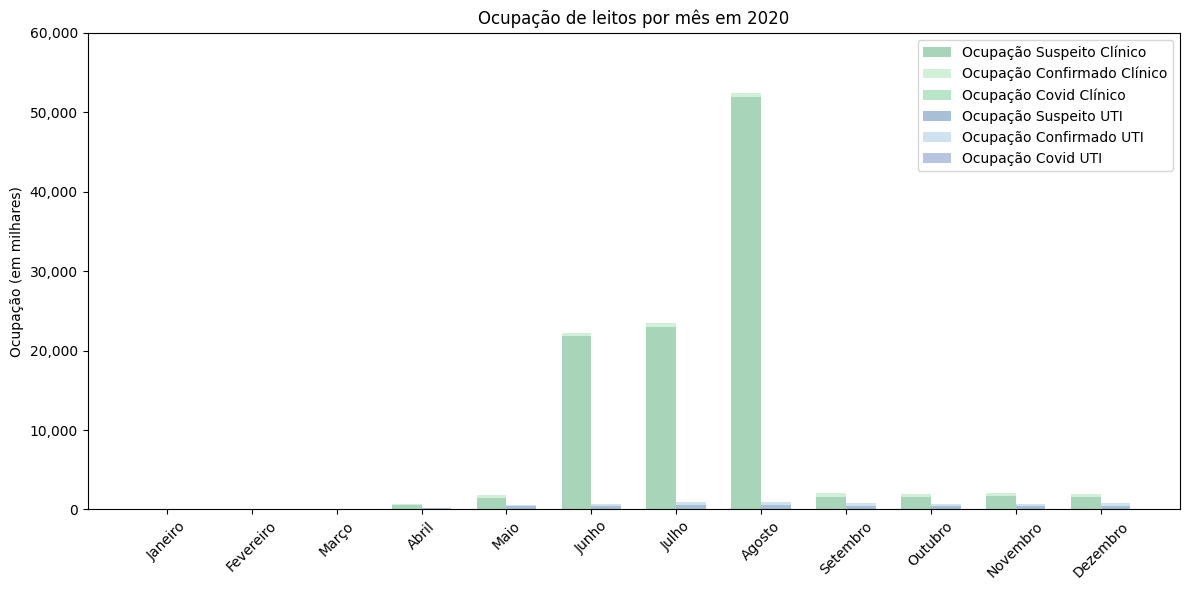

In [46]:
months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])

colors_clinico = ['#A8D5BA', '#D1EFD9', '#B8E4C9']
colors_uti = ['#A8BFD5', '#D1E2EF', '#B8C4E0']

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(ocup_leitos_2020_agrupado['Mes']))

bar1 = ax.bar(index, ocup_leitos_2020_agrupado['Ocupação Suspeito Clínico'], bar_width, color=colors_clinico[0], label='Ocupação Suspeito Clínico')
bar2 = ax.bar(index, ocup_leitos_2020_agrupado['Ocupação Confirmado Clínico'], bar_width, bottom=ocup_leitos_2020_agrupado['Ocupação Suspeito Clínico'], color=colors_clinico[1], label='Ocupação Confirmado Clínico')
bar3 = ax.bar(index, ocup_leitos_2020_agrupado['Ocupação Covid Clínico'], bar_width, bottom=ocup_leitos_2020_agrupado['Ocupação Suspeito Clínico'] + ocup_leitos_2020_agrupado['Ocupação Confirmado Clínico'], color=colors_clinico[2], label='Ocupação Covid Clínico')

bar4 = ax.bar(index + bar_width, ocup_leitos_2020_agrupado['Ocupação Suspeito UTI'], bar_width, color=colors_uti[0], label='Ocupação Suspeito UTI')
bar5 = ax.bar(index + bar_width, ocup_leitos_2020_agrupado['Ocupação Confirmado UTI'], bar_width, bottom=ocup_leitos_2020_agrupado['Ocupação Suspeito UTI'], color=colors_uti[1], label='Ocupação Confirmado UTI')
bar6 = ax.bar(index + bar_width, ocup_leitos_2020_agrupado['Ocupação Covid UTI'], bar_width, bottom=ocup_leitos_2020_agrupado['Ocupação Suspeito UTI'] + ocup_leitos_2020_agrupado['Ocupação Confirmado UTI'], color=colors_uti[2], label='Ocupação Covid UTI')

ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de leitos por mês em 2020')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()
ax.set_ylim(0, 60000000)  # Ajustando a escala do eixo Y

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x)/1000, ',').replace(".0", ""))
)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

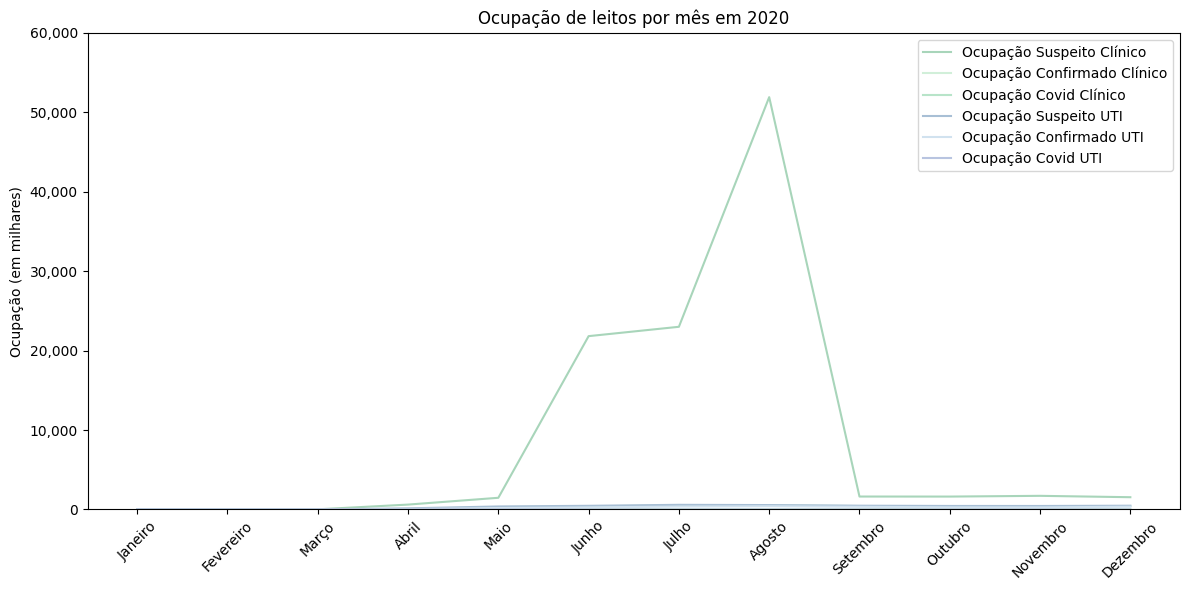

In [140]:
months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
          "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])

colors_clinico = ['#A8D5BA', '#D1EFD9', '#B8E4C9']
colors_uti = ['#A8BFD5', '#D1E2EF', '#B8C4E0']

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Ocupação Suspeito Clínico'], color=colors_clinico[0], label='Ocupação Suspeito Clínico')
ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Ocupação Confirmado Clínico'], color=colors_clinico[1], label='Ocupação Confirmado Clínico')
ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Ocupação Covid Clínico'], color=colors_clinico[2], label='Ocupação Covid Clínico')

ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Ocupação Suspeito UTI'], color=colors_uti[0], label='Ocupação Suspeito UTI')
ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Ocupação Confirmado UTI'], color=colors_uti[1], label='Ocupação Confirmado UTI')
ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Ocupação Covid UTI'], color=colors_uti[2], label='Ocupação Covid UTI')



ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de leitos por mês em 2020')
ax.set_xticks(range(len(ocup_leitos_2020_agrupado['Mes'])))
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()
ax.set_ylim(0, 60000000)  # Ajustando a escala do eixo Y

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x)/1000, ',').replace(".0", ""))
)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


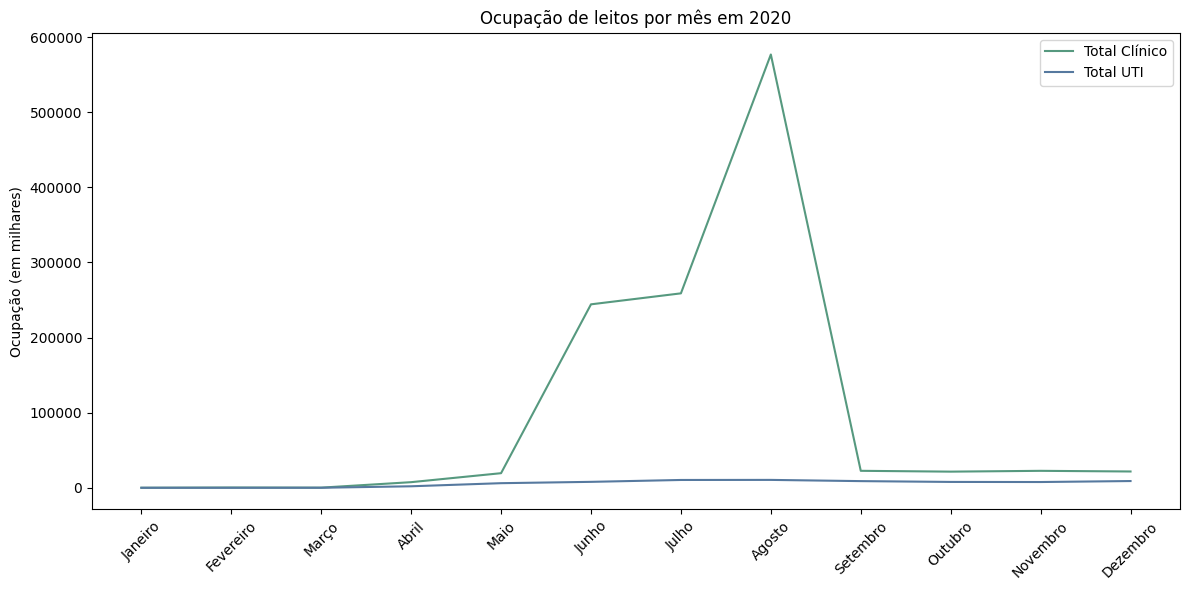

In [149]:
months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
          "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])

ocup_leitos_2020_agrupado['Total Clínico'] = ocup_leitos_2020_agrupado.filter(like='Clínico').sum(axis=1)
ocup_leitos_2020_agrupado['Total UTI'] = ocup_leitos_2020_agrupado.filter(like='UTI').sum(axis=1)

colors_clinico = ['#56997F']
colors_uti = ['#56799F']

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Total Clínico'] / 1000, color=colors_clinico[0], label='Total Clínico')
ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Total UTI'] / 1000, color=colors_uti[0], label='Total UTI')

ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de leitos por mês em 2020')
ax.set_xticks(range(len(ocup_leitos_2020_agrupado['Mes'])))
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


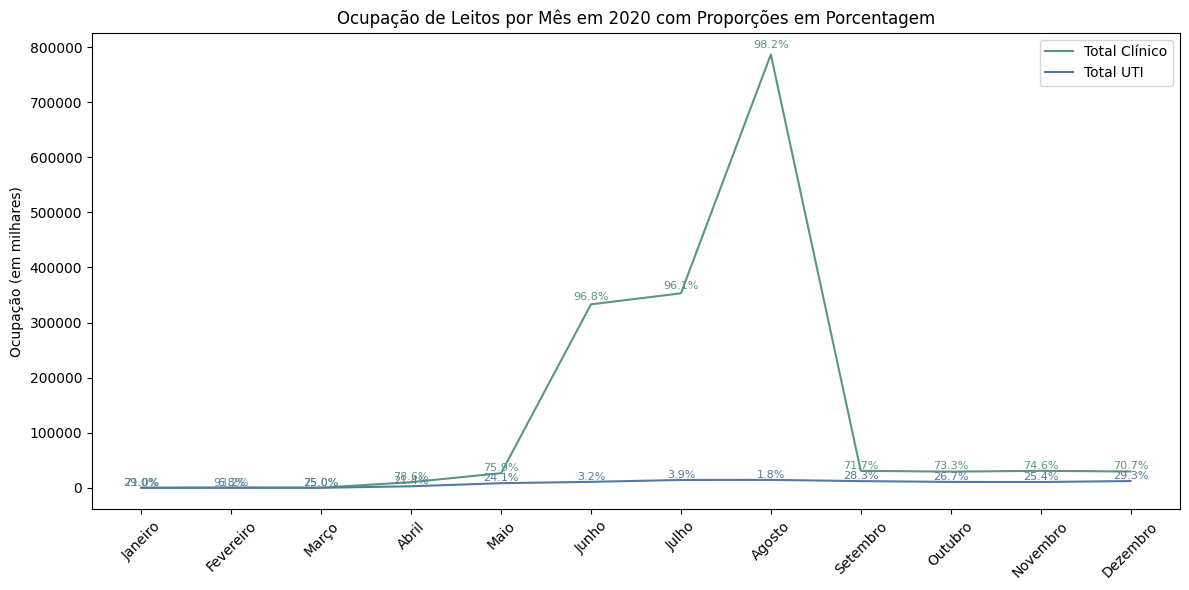

In [30]:

months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
          "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])

ocup_leitos_2020_agrupado['Total Clínico'] = ocup_leitos_2020_agrupado.filter(like='Clínico').sum(axis=1)
ocup_leitos_2020_agrupado['Total UTI'] = ocup_leitos_2020_agrupado.filter(like='UTI').sum(axis=1)

ocup_leitos_2020_agrupado['Total Ocupação'] = ocup_leitos_2020_agrupado['Total Clínico'] + ocup_leitos_2020_agrupado['Total UTI']
ocup_leitos_2020_agrupado['Proporção Clínico'] = ocup_leitos_2020_agrupado['Total Clínico'] / ocup_leitos_2020_agrupado['Total Ocupação']
ocup_leitos_2020_agrupado['Proporção UTI'] = ocup_leitos_2020_agrupado['Total UTI'] / ocup_leitos_2020_agrupado['Total Ocupação']

colors_clinico = ['#56997F']
colors_uti = ['#56799F']

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Total Clínico'] / 1000, color=colors_clinico[0], label='Total Clínico')
ax.plot(ocup_leitos_2020_agrupado['Mes'], ocup_leitos_2020_agrupado['Total UTI'] / 1000, color=colors_uti[0], label='Total UTI')

percent_offset = 0.01  # Porcentagem de deslocamento em relação ao valor y
for (x, y_clinico, y_uti, pct_clinico, pct_uti) in zip(ocup_leitos_2020_agrupado['Mes'], 
                                                      ocup_leitos_2020_agrupado['Total Clínico'] / 1000, 
                                                      ocup_leitos_2020_agrupado['Total UTI'] / 1000, 
                                                      ocup_leitos_2020_agrupado['Proporção Clínico'] * 100, 
                                                      ocup_leitos_2020_agrupado['Proporção UTI'] * 100):
    ax.text(x, y_clinico * (1 + percent_offset), f'{pct_clinico:.1f}%', ha='center', va='bottom', fontsize=8, color=colors_clinico[0])
    ax.text(x, y_uti, f'{pct_uti:.1f}%', ha='center', va='bottom', fontsize=8, color=colors_uti[0])

ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de Leitos por Mês em 2020 com Proporções em Porcentagem')
ax.set_xticks(range(len(ocup_leitos_2020_agrupado['Mes'])))
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

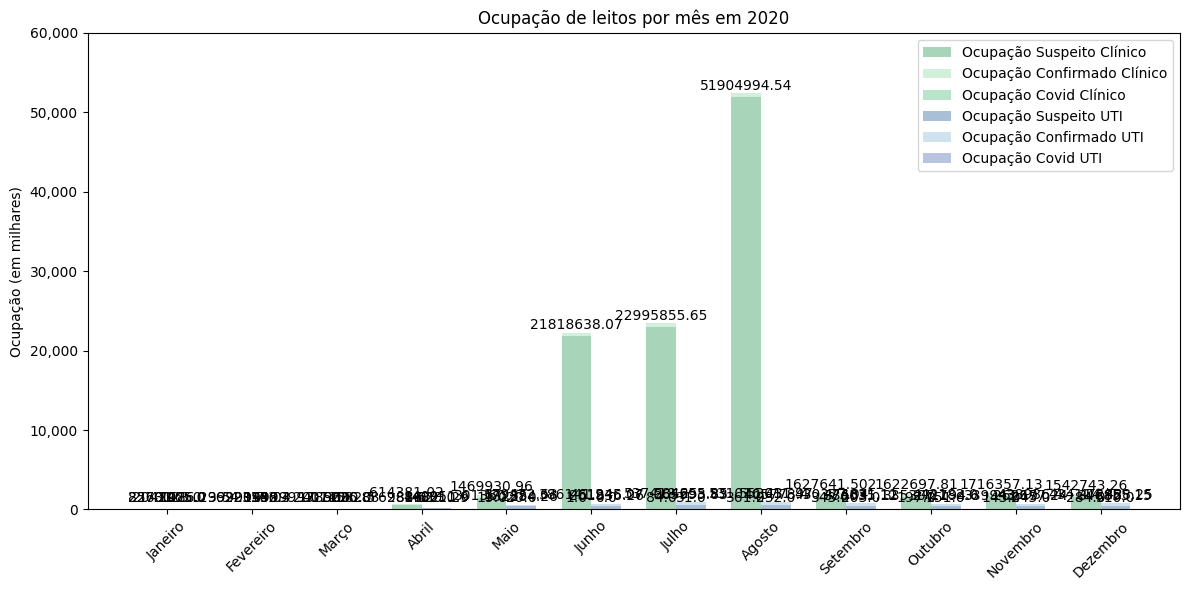

In [19]:
months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])



colors_clinico = ['#A8D5BA', '#D1EFD9', '#B8E4C9']
colors_uti = ['#A8BFD5', '#D1E2EF', '#B8C4E0']

def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(ocup_leitos_2020_agrupado['Mes']))

bar1 = ax.bar(index, ocup_leitos_2020_agrupado['Ocupação Suspeito Clínico'], bar_width, color=colors_clinico[0], label='Ocupação Suspeito Clínico')
add_bar_labels(bar1)

bar2 = ax.bar(index, ocup_leitos_2020_agrupado['Ocupação Confirmado Clínico'], bar_width, bottom=ocup_leitos_2020_agrupado['Ocupação Suspeito Clínico'], color=colors_clinico[1], label='Ocupação Confirmado Clínico')
add_bar_labels(bar2)

bar3 = ax.bar(index, ocup_leitos_2020_agrupado['Ocupação Covid Clínico'], bar_width, bottom=ocup_leitos_2020_agrupado['Ocupação Suspeito Clínico'] + ocup_leitos_2020_agrupado['Ocupação Confirmado Clínico'], color=colors_clinico[2], label='Ocupação Covid Clínico')
add_bar_labels(bar3)

bar4 = ax.bar(index + bar_width, ocup_leitos_2020_agrupado['Ocupação Suspeito UTI'], bar_width, color=colors_uti[0], label='Ocupação Suspeito UTI')
add_bar_labels(bar4)

bar5 = ax.bar(index + bar_width, ocup_leitos_2020_agrupado['Ocupação Confirmado UTI'], bar_width, bottom=ocup_leitos_2020_agrupado['Ocupação Suspeito UTI'], color=colors_uti[1], label='Ocupação Confirmado UTI')
add_bar_labels(bar5)

bar6 = ax.bar(index + bar_width, ocup_leitos_2020_agrupado['Ocupação Covid UTI'], bar_width, bottom=ocup_leitos_2020_agrupado['Ocupação Suspeito UTI'] + ocup_leitos_2020_agrupado['Ocupação Confirmado UTI'], color=colors_uti[2], label='Ocupação Covid UTI')
add_bar_labels(bar6)

ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de leitos por mês em 2020')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()
ax.set_ylim(0, 60000000)  # Ajustando a escala do eixo Y

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x)/1000, ',').replace(".0", ""))
)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


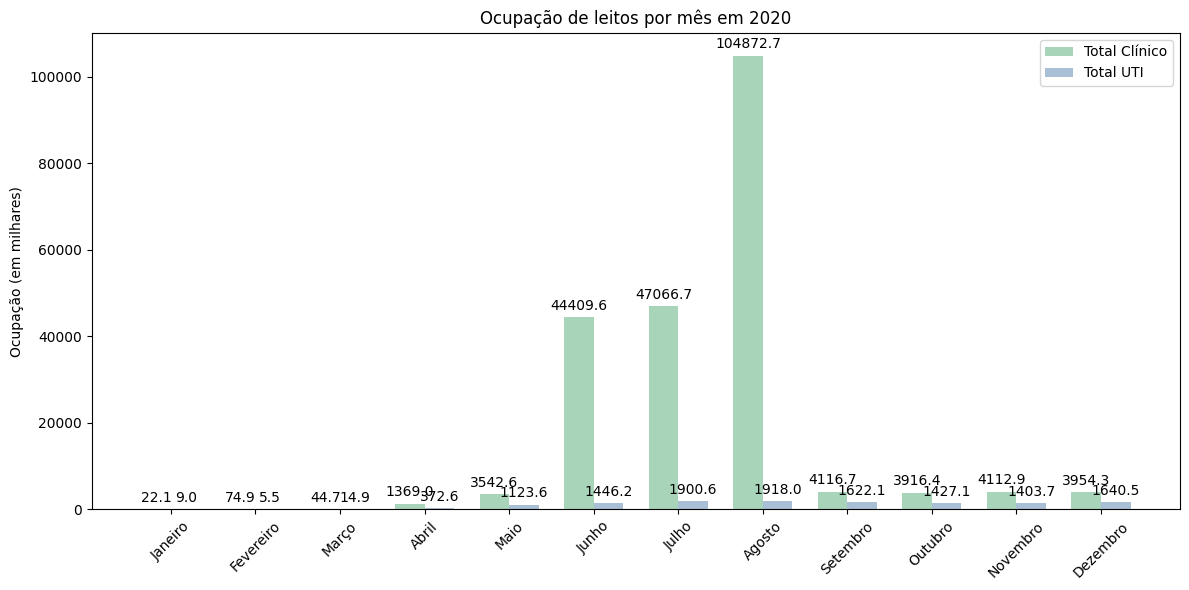

In [131]:
months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
          "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])

ocup_leitos_2020_agrupado['Total Clínico'] = ocup_leitos_2020_agrupado.filter(like='Clínico').sum(axis=1) / 1000  # Convertendo para milhares
ocup_leitos_2020_agrupado['Total UTI'] = ocup_leitos_2020_agrupado.filter(like='UTI').sum(axis=1) / 1000  # Convertendo para milhares

colors_clinico = ['#A8D5BA']
colors_uti = ['#A8BFD5']

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(ocup_leitos_2020_agrupado['Mes']))

bar1 = ax.bar(index, ocup_leitos_2020_agrupado['Total Clínico'], bar_width, color=colors_clinico[0], label='Total Clínico')
bar2 = ax.bar(index + bar_width, ocup_leitos_2020_agrupado['Total UTI'], bar_width, color=colors_uti[0], label='Total UTI')

ax.bar_label(bar1, padding=3, fmt='%.1f')
ax.bar_label(bar2, padding=3, fmt='%.1f')

ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de leitos por mês em 2020')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


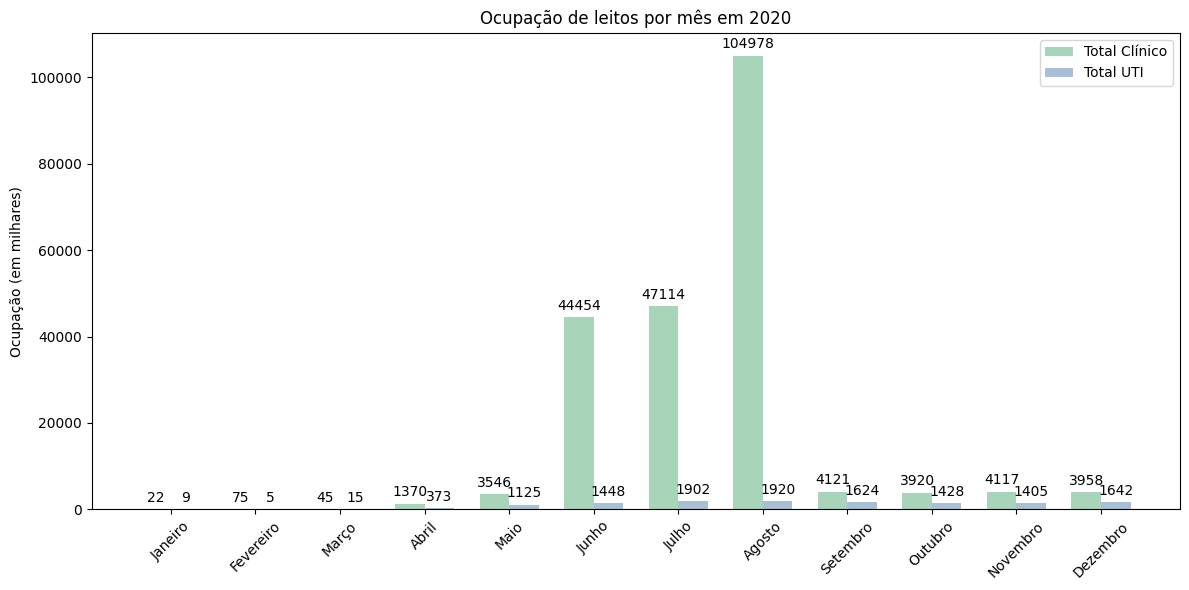

In [133]:
months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
          "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
ocup_leitos_2020_agrupado['Mes'] = ocup_leitos_2020_agrupado.index.map(lambda x: months[x])

ocup_leitos_2020_agrupado['Total Clínico'] = ocup_leitos_2020_agrupado.filter(like='Clínico').sum(axis=1)
ocup_leitos_2020_agrupado['Total UTI'] = ocup_leitos_2020_agrupado.filter(like='UTI').sum(axis=1)

colors_clinico = ['#A8D5BA']
colors_uti = ['#A8BFD5']

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(ocup_leitos_2020_agrupado['Mes']))

bar1 = ax.bar(index, ocup_leitos_2020_agrupado['Total Clínico'] / 1000, bar_width, color=colors_clinico[0], label='Total Clínico')
bar2 = ax.bar(index + bar_width, ocup_leitos_2020_agrupado['Total UTI'] / 1000, bar_width, color=colors_uti[0], label='Total UTI')

def add_thousand_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')
        
add_thousand_labels(bar1)
add_thousand_labels(bar2)

ax.set_ylabel('Ocupação (em milhares)')
ax.set_title('Ocupação de leitos por mês em 2020')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(ocup_leitos_2020_agrupado['Mes'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Orçamento da despesa 2020

https://portaldatransparencia.gov.br/download-de-dados/orcamento-despesa

In [78]:
orc_desp_2020 = pd.read_csv("2020_OrcamentoDespesa.zip.csv", encoding="ISO-8859-1", sep=';')

In [79]:
orc_desp_2020_saude = orc_desp_2020.query('`NOME ÓRGÃO SUPERIOR` == "Ministério da Saúde"')

In [80]:
orc_desp_2020_saude['ORÇAMENTO INICIAL (R$)'] = orc_desp_2020_saude['ORÇAMENTO INICIAL (R$)'].str.replace('.', '').str.replace(',', '.').astype(float)
orc_desp_2020_saude['ORÇAMENTO ATUALIZADO (R$)'] = orc_desp_2020_saude['ORÇAMENTO ATUALIZADO (R$)'].str.replace('.', '').str.replace(',', '.').astype(float)
orc_desp_2020_saude['ORÇAMENTO EMPENHADO (R$)'] = orc_desp_2020_saude['ORÇAMENTO EMPENHADO (R$)'].str.replace('.', '').str.replace(',', '.').astype(float)
orc_desp_2020_saude['ORÇAMENTO REALIZADO (R$)'] = orc_desp_2020_saude['ORÇAMENTO REALIZADO (R$)'].str.replace('.', '').str.replace(',', '.').astype(float)

C:\Users\GUILHERMEPRADOROCHA\AppData\Local\Temp\ipykernel_5028\2441991333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orc_desp_2020_saude['ORÇAMENTO INICIAL (R$)'] = orc_desp_2020_saude['ORÇAMENTO INICIAL (R$)'].str.replace('.', '').str.replace(',', '.').astype(float)
C:\Users\GUILHERMEPRADOROCHA\AppData\Local\Temp\ipykernel_5028\2441991333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orc_desp_2020_saude['ORÇAMENTO ATUALIZADO (R$)'] = orc_desp_2020_saude['ORÇAMENTO ATUALIZADO (R$)'].str.repla

In [81]:
soma_orcamento_inicial = orc_desp_2020_saude['ORÇAMENTO INICIAL (R$)'].sum()
soma_orcamento_atualizado = orc_desp_2020_saude['ORÇAMENTO ATUALIZADO (R$)'].sum()
soma_orcamento_empenhado = orc_desp_2020_saude['ORÇAMENTO EMPENHADO (R$)'].sum()
soma_orcamento_realizado = orc_desp_2020_saude['ORÇAMENTO REALIZADO (R$)'].sum()

In [82]:
total_orcamento = pd.DataFrame({
    'TOTAL ORÇAMENTO INICIAL (R$)': [soma_orcamento_inicial],
    'TOTAL ORÇAMENTO ATUALIZADO (R$)': [soma_orcamento_atualizado],
    'TOTAL ORÇAMENTO EMPENHADO (R$)': [soma_orcamento_empenhado],
    'TOTAL ORÇAMENTO REALIZADO (R$)': [soma_orcamento_realizado]
})


In [83]:
total_orcamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TOTAL ORÇAMENTO INICIAL (R$)     1 non-null      float64
 1   TOTAL ORÇAMENTO ATUALIZADO (R$)  1 non-null      float64
 2   TOTAL ORÇAMENTO EMPENHADO (R$)   1 non-null      float64
 3   TOTAL ORÇAMENTO REALIZADO (R$)   1 non-null      float64
dtypes: float64(4)
memory usage: 160.0 bytes


In [84]:
df = pd.DataFrame(total_orcamento)
df.to_csv("total_orcamento_min_saude_2020.csv", index=False)

In [86]:
print(df)

   TOTAL ORÇAMENTO INICIAL (R$)  TOTAL ORÇAMENTO ATUALIZADO (R$)  \
0                  1.389598e+11                     1.980933e+11   

   TOTAL ORÇAMENTO EMPENHADO (R$)  TOTAL ORÇAMENTO REALIZADO (R$)  
0                    1.692985e+11                    1.562459e+11  


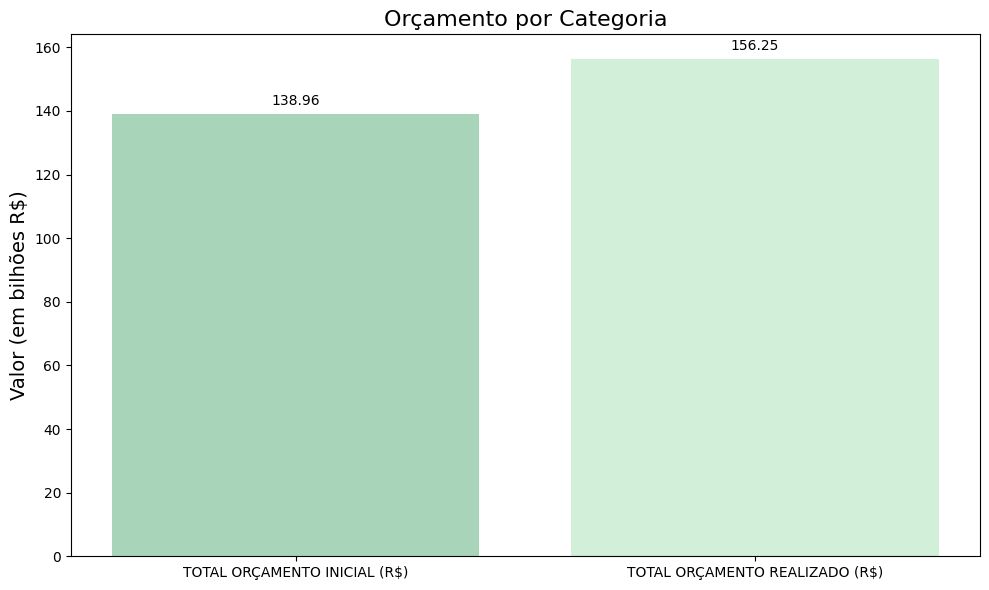

In [91]:

colunas_selecionadas = ["TOTAL ORÇAMENTO INICIAL (R$)", "TOTAL ORÇAMENTO REALIZADO (R$)"]
valores_orcamento = df[colunas_selecionadas].iloc[0].tolist()
rotulos_colunas = colunas_selecionadas

cores_selecionadas = cores[:2]

plt.figure(figsize=(10, 6))

bars = plt.bar(rotulos_colunas, [val/1e9 for val in valores_orcamento], color=cores_selecionadas)

for bar, valor in zip(bars, valores_orcamento):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{valor/1e9:.2f}', ha='center', va='bottom')

plt.title("Orçamento por Categoria", fontsize=16)
plt.ylabel("Valor (em bilhões R$)", fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

plt.show()


https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fdadosabertos.ans.gov.br%2FFTP%2FPDA%2Fdados_consolidados_da_saude_suplementar%2FDados_Consolidados_da_Saude_Suplementar.pptx&wdOrigin=BROWSELINK

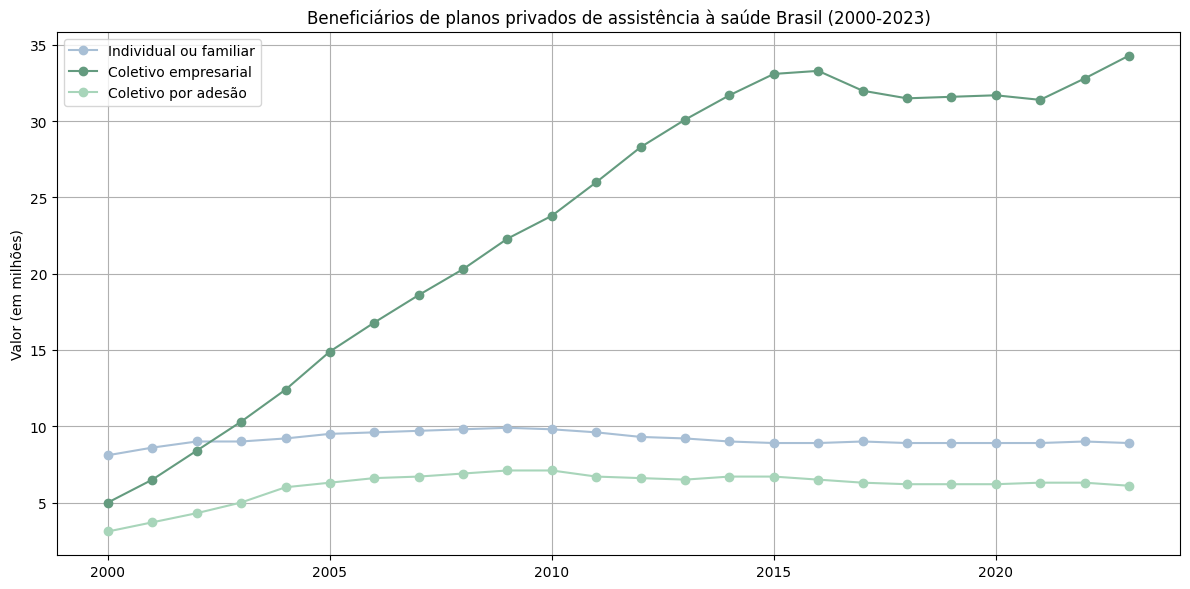

In [118]:
anos = np.arange(2000, 2024)
coletivo_empresarial = [5.0, 6.5, 8.4, 10.3, 12.4, 14.9, 16.8, 18.6, 20.3, 22.3, 23.8, 26.0, 28.3, 30.1, 31.7, 33.1, 33.3, 32.0, 31.5, 31.6, 31.7, 31.4, 32.8, 34.3]
individual_ou_familiar = [8.1, 8.6, 9.0, 9.0, 9.2, 9.5, 9.6, 9.7, 9.8, 9.9, 9.8, 9.6, 9.3, 9.2, 9.0, 8.9, 8.9, 9.0, 8.9, 8.9, 8.9, 8.9, 9.0, 8.9]
coletivo_por_adesao = [3.1, 3.7, 4.3, 5.0, 6.0, 6.3, 6.6, 6.7, 6.9, 7.1, 7.1, 6.7, 6.6, 6.5, 6.7, 6.7, 6.5, 6.3, 6.2, 6.2, 6.2, 6.3, 6.3, 6.1]

plt.figure(figsize=(12, 6))
plt.plot(anos, individual_ou_familiar, color='#A8BFD5', label='Individual ou familiar', marker='o')
plt.plot(anos, coletivo_empresarial, color='#649B7F', label='Coletivo empresarial', marker='o')
plt.plot(anos, coletivo_por_adesao, color='#A8D5BA', label='Coletivo por adesão', marker='o')


plt.ylabel('Valor (em milhões)')
plt.title('Beneficiários de planos privados de assistência à saúde Brasil (2000-2023)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()